# ANN Classification

## Binary Classification

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Create a binary target variable for bianry classification
median_bill = tips['total_bill'].median()
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int) # 1 if high, 0 if low

2025-09-20 16:45:51.793883: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-20 16:45:51.794519: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 16:45:51.796877: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 16:45:51.803207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758368751.814296  255859 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758368751.81

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,high_bill
0,16.99,1.01,0,0,2,0,2,0
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [3]:
# Load the dataset
tips_1 = sns.load_dataset("tips")
tips_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size,high_bill
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672,0.500000
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100,0.501028
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000,0.500000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,1.000000


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,high_bill
0,16.99,1.01,0,0,2,0,2,0
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [6]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Create a binary target variable for bianry classification
median_bill = tips['total_bill'].median()
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int)

# Split the data into training and test sets
X = tips.drop(['total_bill', 'high_bill'], axis=1)
y = tips['high_bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# print('Test Accuracy: %.2f' % (accuracy*100))
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10


/home/tk-lpt-648/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-09-20 16:45:53.257654: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5496 - loss: 0.6775  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5571 - loss: 0.6664 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5606 - loss: 0.6630 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5280 - loss: 0.6736 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5919 - loss: 0.6550 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.6586 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6068 - loss: 0.6547 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 0.6503 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6447 - loss: 0.6390 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6739 - loss: 0.6401
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6781 - loss: 0.6437
Test Accuracy: 0.67


## Multiclass Classification

In [7]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])


# Split the data into training and test sets
X = tips.drop(['day'], axis=1)
y = tips['day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the model
# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(y_train.unique().shape[0], activation='softmax') # no. of neurons will be equal to the number of unique classes(categories)
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # sparse_categorical_crossentropy is used for integer labels. In our case, outputs are 0,1,2,3
# Note: If you have one-hot encoded labels, use 'categorical_crossentropy' instead.

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100}')

Epoch 1/10


/home/tk-lpt-648/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2240 - loss: 1.4853 - val_accuracy: 0.1026 - val_loss: 1.5297
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2486 - loss: 1.4052 - val_accuracy: 0.1538 - val_loss: 1.4734
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2913 - loss: 1.3367 - val_accuracy: 0.2564 - val_loss: 1.4207
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3738 - loss: 1.2996 - val_accuracy: 0.3077 - val_loss: 1.3703
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4327 - loss: 1.2561 - val_accuracy: 0.3077 - val_loss: 1.3246
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4984 - loss: 1.2035 - val_accuracy: 0.3846 - val_loss: 1.2833
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5077 - loss: 1.1504 - val_accuracy: 0.4359 - val_loss: 1.2421
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5500 - loss: 1.1353 - val_accuracy: 0.5128 - val_loss: 1.2040
Epoch 9/10


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6054 - loss: 1.0030 - val_accuracy: 0.5897 - val_loss: 1.0987
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6119 - loss: 0.9881 - val_accuracy: 0.6154 - val_loss: 1.0659
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6197 - loss: 0.9609 - val_accuracy: 0.6154 - val_loss: 1.0349
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5707 - loss: 0.9656 - val_accuracy: 0.6923 - val_loss: 1.0043
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6465 - loss: 0.8954 - val_accuracy: 0.7436 - val_loss: 0.9755
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6006 - loss: 0.9189 - val_accuracy: 0.7436 - val_loss: 0.9494
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6049 - loss: 0.8921 - val_accuracy: 0.7692 - val_loss: 0.9273
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6075 - loss: 0.8296 - val_accuracy: 0.7692 - val_loss: 0.9058


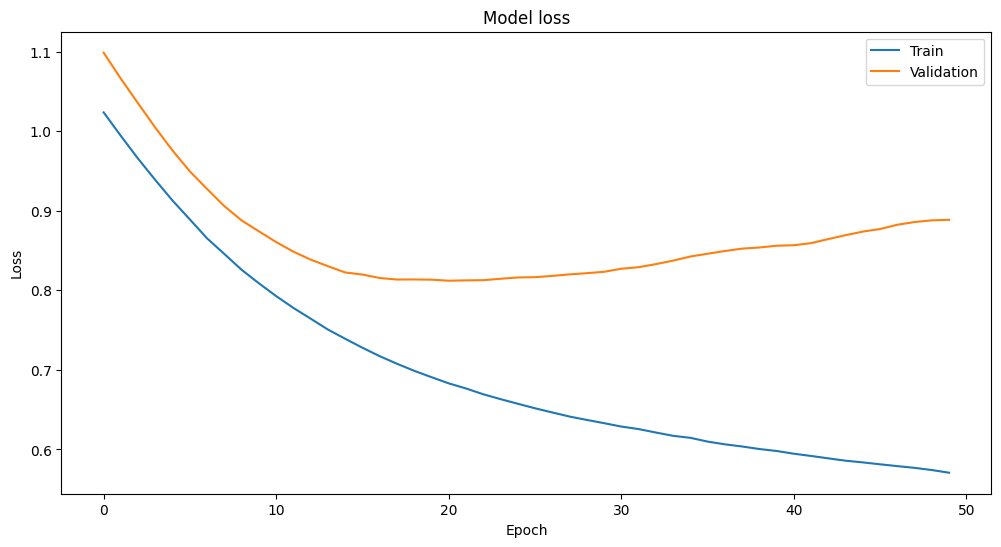

In [8]:
import matplotlib.pyplot as plt
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy is used when labels are one-hot encoded

# Then use these one-hot encoded labels for training and evaluation
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Accuracy: {accuracy*100}')

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7130 - loss: 0.6076 - val_accuracy: 0.6154 - val_loss: 0.9217
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7634 - loss: 0.5748 - val_accuracy: 0.6410 - val_loss: 0.9191
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7552 - loss: 0.5052 - val_accuracy: 0.6410 - val_loss: 0.9205
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7956 - loss: 0.4929 - val_accuracy: 0.6410 - val_loss: 0.9228
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5098 - val_accuracy: 0.6410 - val_loss: 0.9261
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7343 - loss: 0.5253 - val_accuracy: 0.6410 - val_loss: 0.9312
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7733 - loss: 0.5690 - val_accuracy: 0.6410 - val_loss: 0.9332
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7798 - loss: 0.5152 - val_accuracy: 0.6410 - val_loss: 0.9353


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7564 - loss: 0.5462 - val_accuracy: 0.6410 - val_loss: 0.9455
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7950 - loss: 0.5073 - val_accuracy: 0.6410 - val_loss: 0.9451
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7581 - loss: 0.5389 - val_accuracy: 0.6410 - val_loss: 0.9444
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7538 - loss: 0.5405 - val_accuracy: 0.6410 - val_loss: 0.9447
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7565 - loss: 0.5333 - val_accuracy: 0.6410 - val_loss: 0.9490
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7317 - loss: 0.5116 - val_accuracy: 0.6410 - val_loss: 0.9518
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7294 - loss: 0.5639 - val_accuracy: 0.6410 - val_loss: 0.9610
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7542 - loss: 0.5267 - val_accuracy: 0.6410 - val_loss: 0.9599


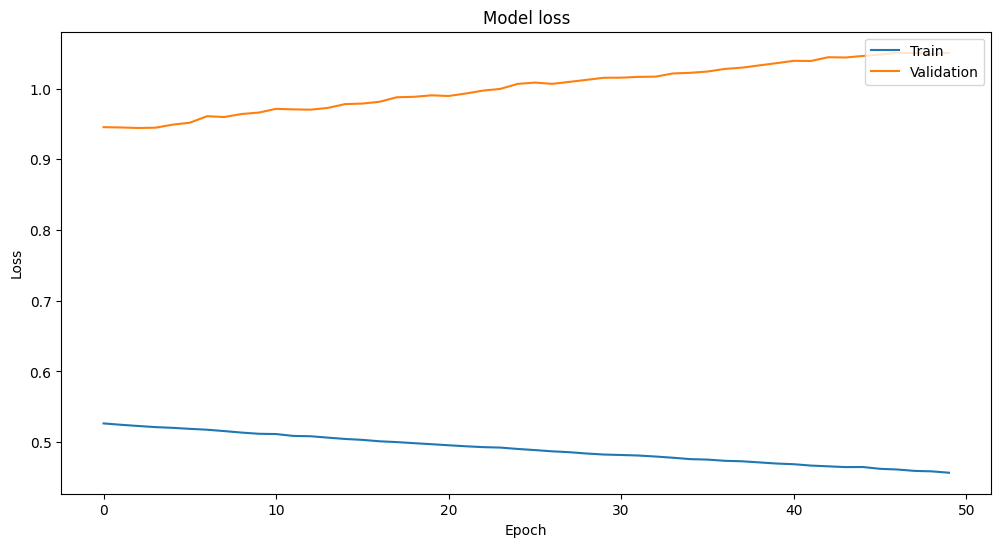

In [11]:
import matplotlib.pyplot as plt
# Train the model and store the history
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()